In [ ]:
 import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe() # 기술적 통계

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
lr = LogisticRegression(C=20) # 규제 매개 변수 값 변경
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7802578410621512
0.7776923076923077


In [ ]:
lr = LogisticRegression(C=20, solver='saga') # 다른 알고리즘 선택
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7804502597652492
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51478472  1.68373153 -0.68897346]] [1.82366771]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


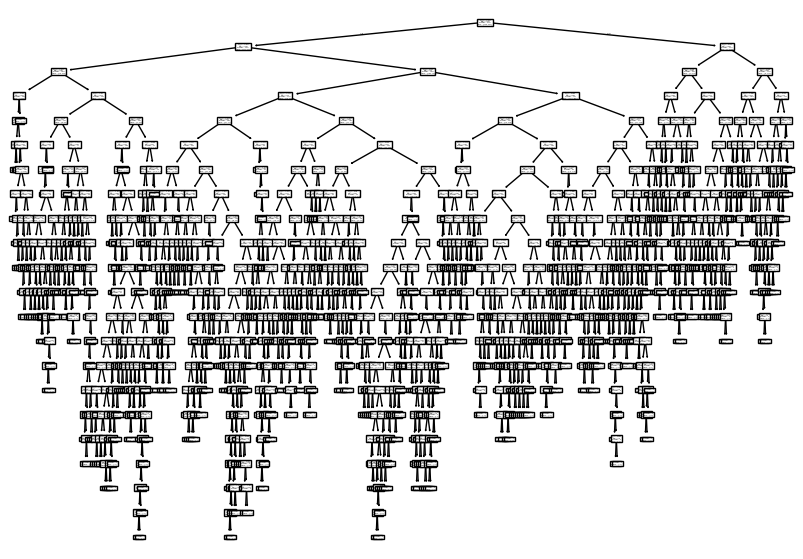

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # sklearn 안에 있음
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

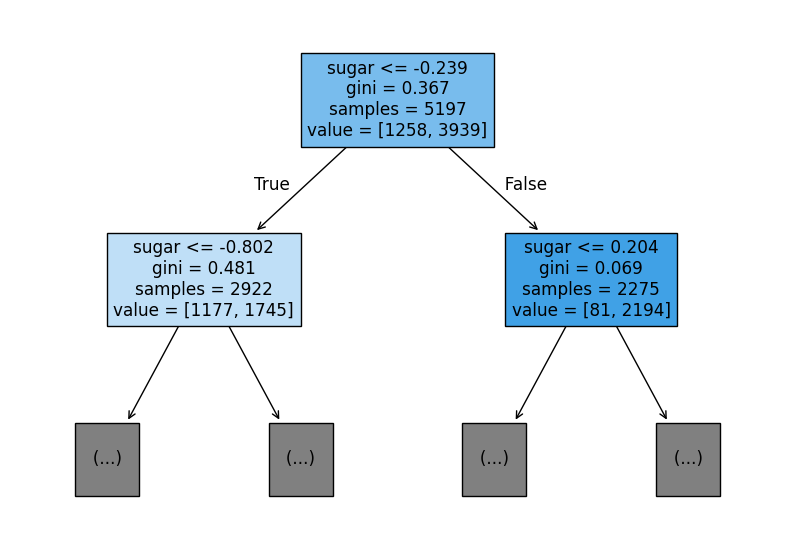

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

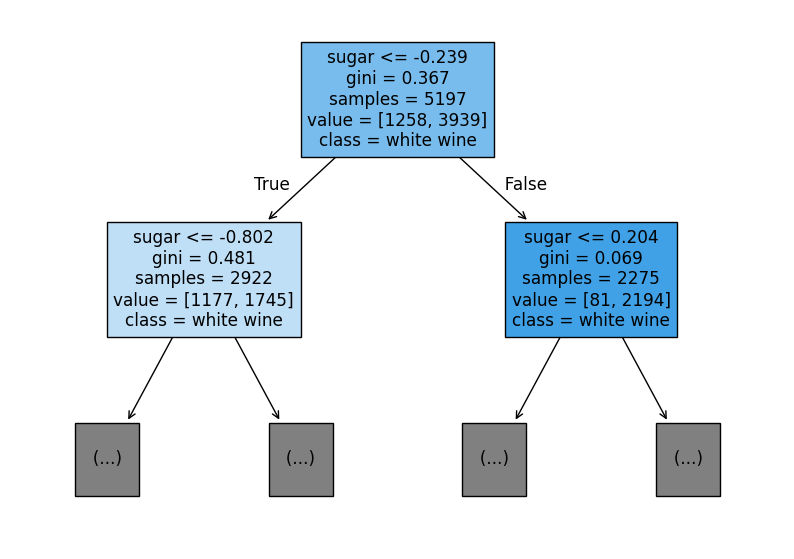

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar','pH'], class_names=['red wine', 'white wine'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


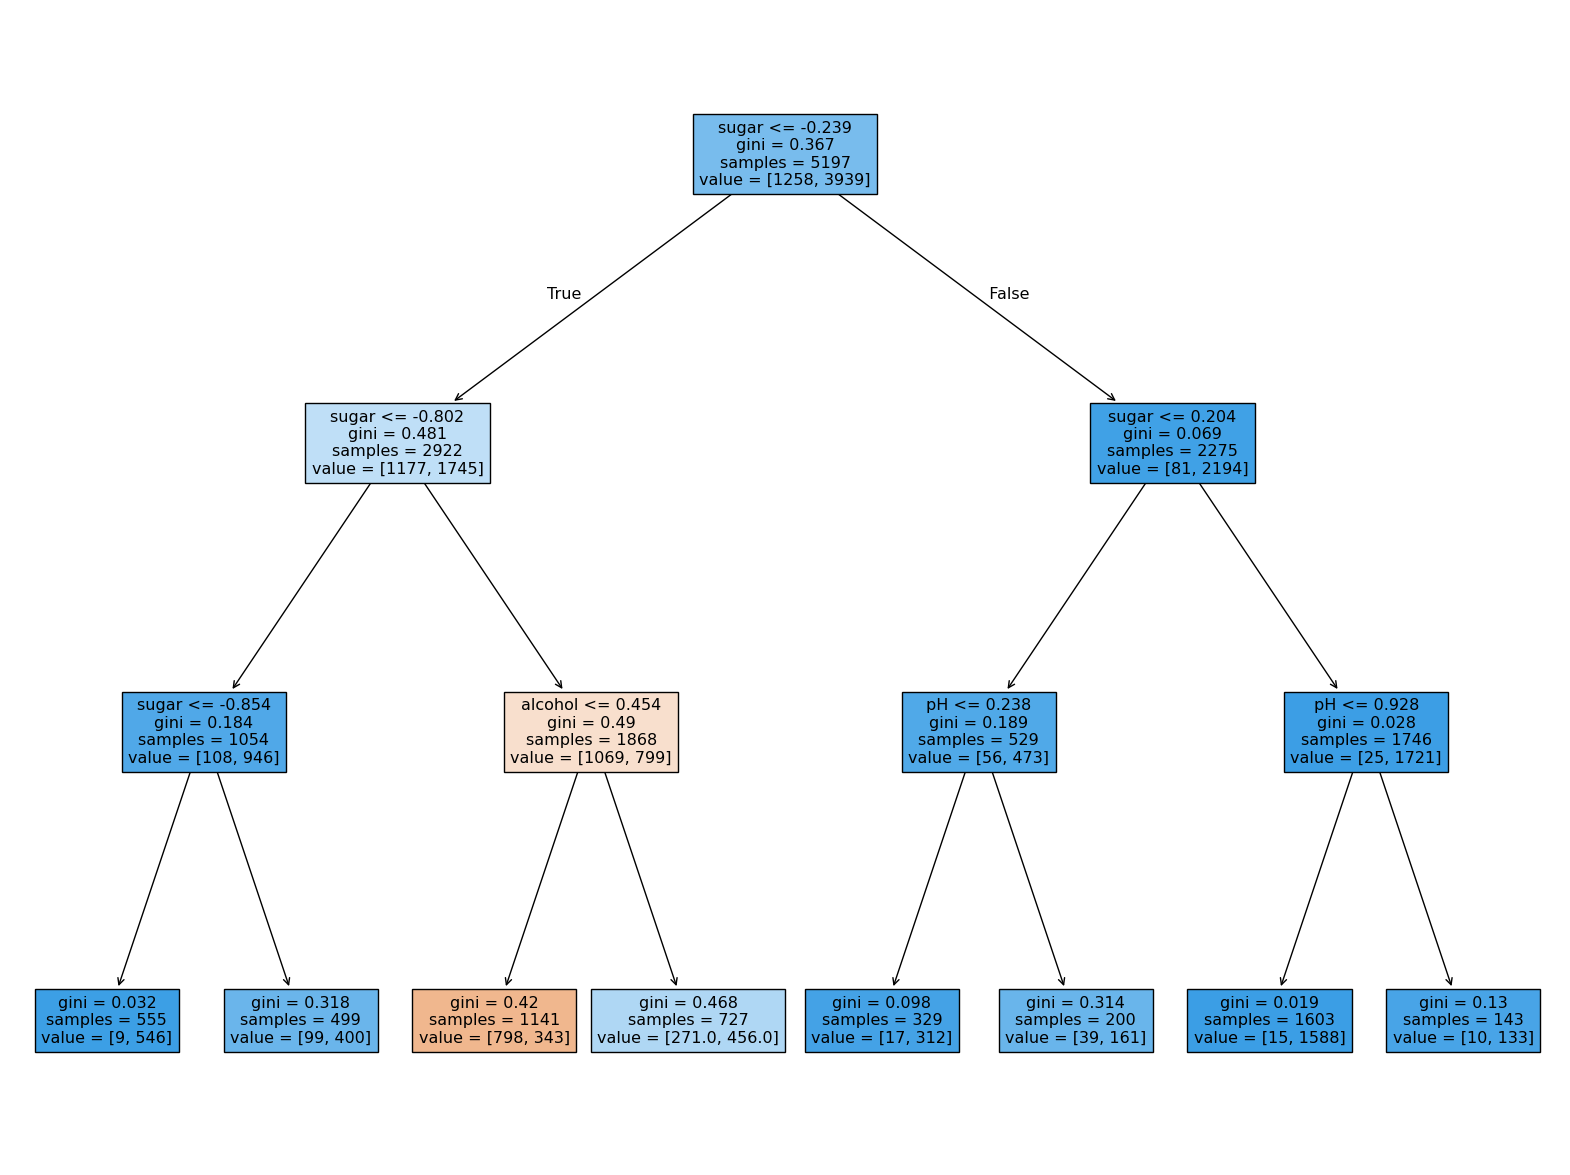

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

In [ ]:
print(dt.feature_importances_) # 로지스틱 회귀식 계수값, 의사결정트리 특성 중요도 -> sugara, alcohol, pH 순으로 중요

[0.12345626 0.86862934 0.0079144 ]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('train data 적용 모델 성능 결과')
print(confusion_matrix(train_target, dt.predict(train_scaled)))
print(classification_report(train_target, dt.predict(train_scaled)))

print('test data 적용 모델 성능 결과')
print(confusion_matrix(test_target, dt.predict(test_scaled)))
print(classification_report(test_target, dt.predict(test_scaled)))

train data 적용 모델 성능 결과
[[ 798  460]
 [ 343 3596]]
              precision    recall  f1-score   support

         0.0       0.70      0.63      0.67      1258
         1.0       0.89      0.91      0.90      3939

    accuracy                           0.85      5197
   macro avg       0.79      0.77      0.78      5197
weighted avg       0.84      0.85      0.84      5197

test data 적용 모델 성능 결과
[[213 128]
 [ 78 881]]
              precision    recall  f1-score   support

         0.0       0.73      0.62      0.67       341
         1.0       0.87      0.92      0.90       959

    accuracy                           0.84      1300
   macro avg       0.80      0.77      0.78      1300
weighted avg       0.84      0.84      0.84      1300



0.8874350586877044
0.8615384615384616


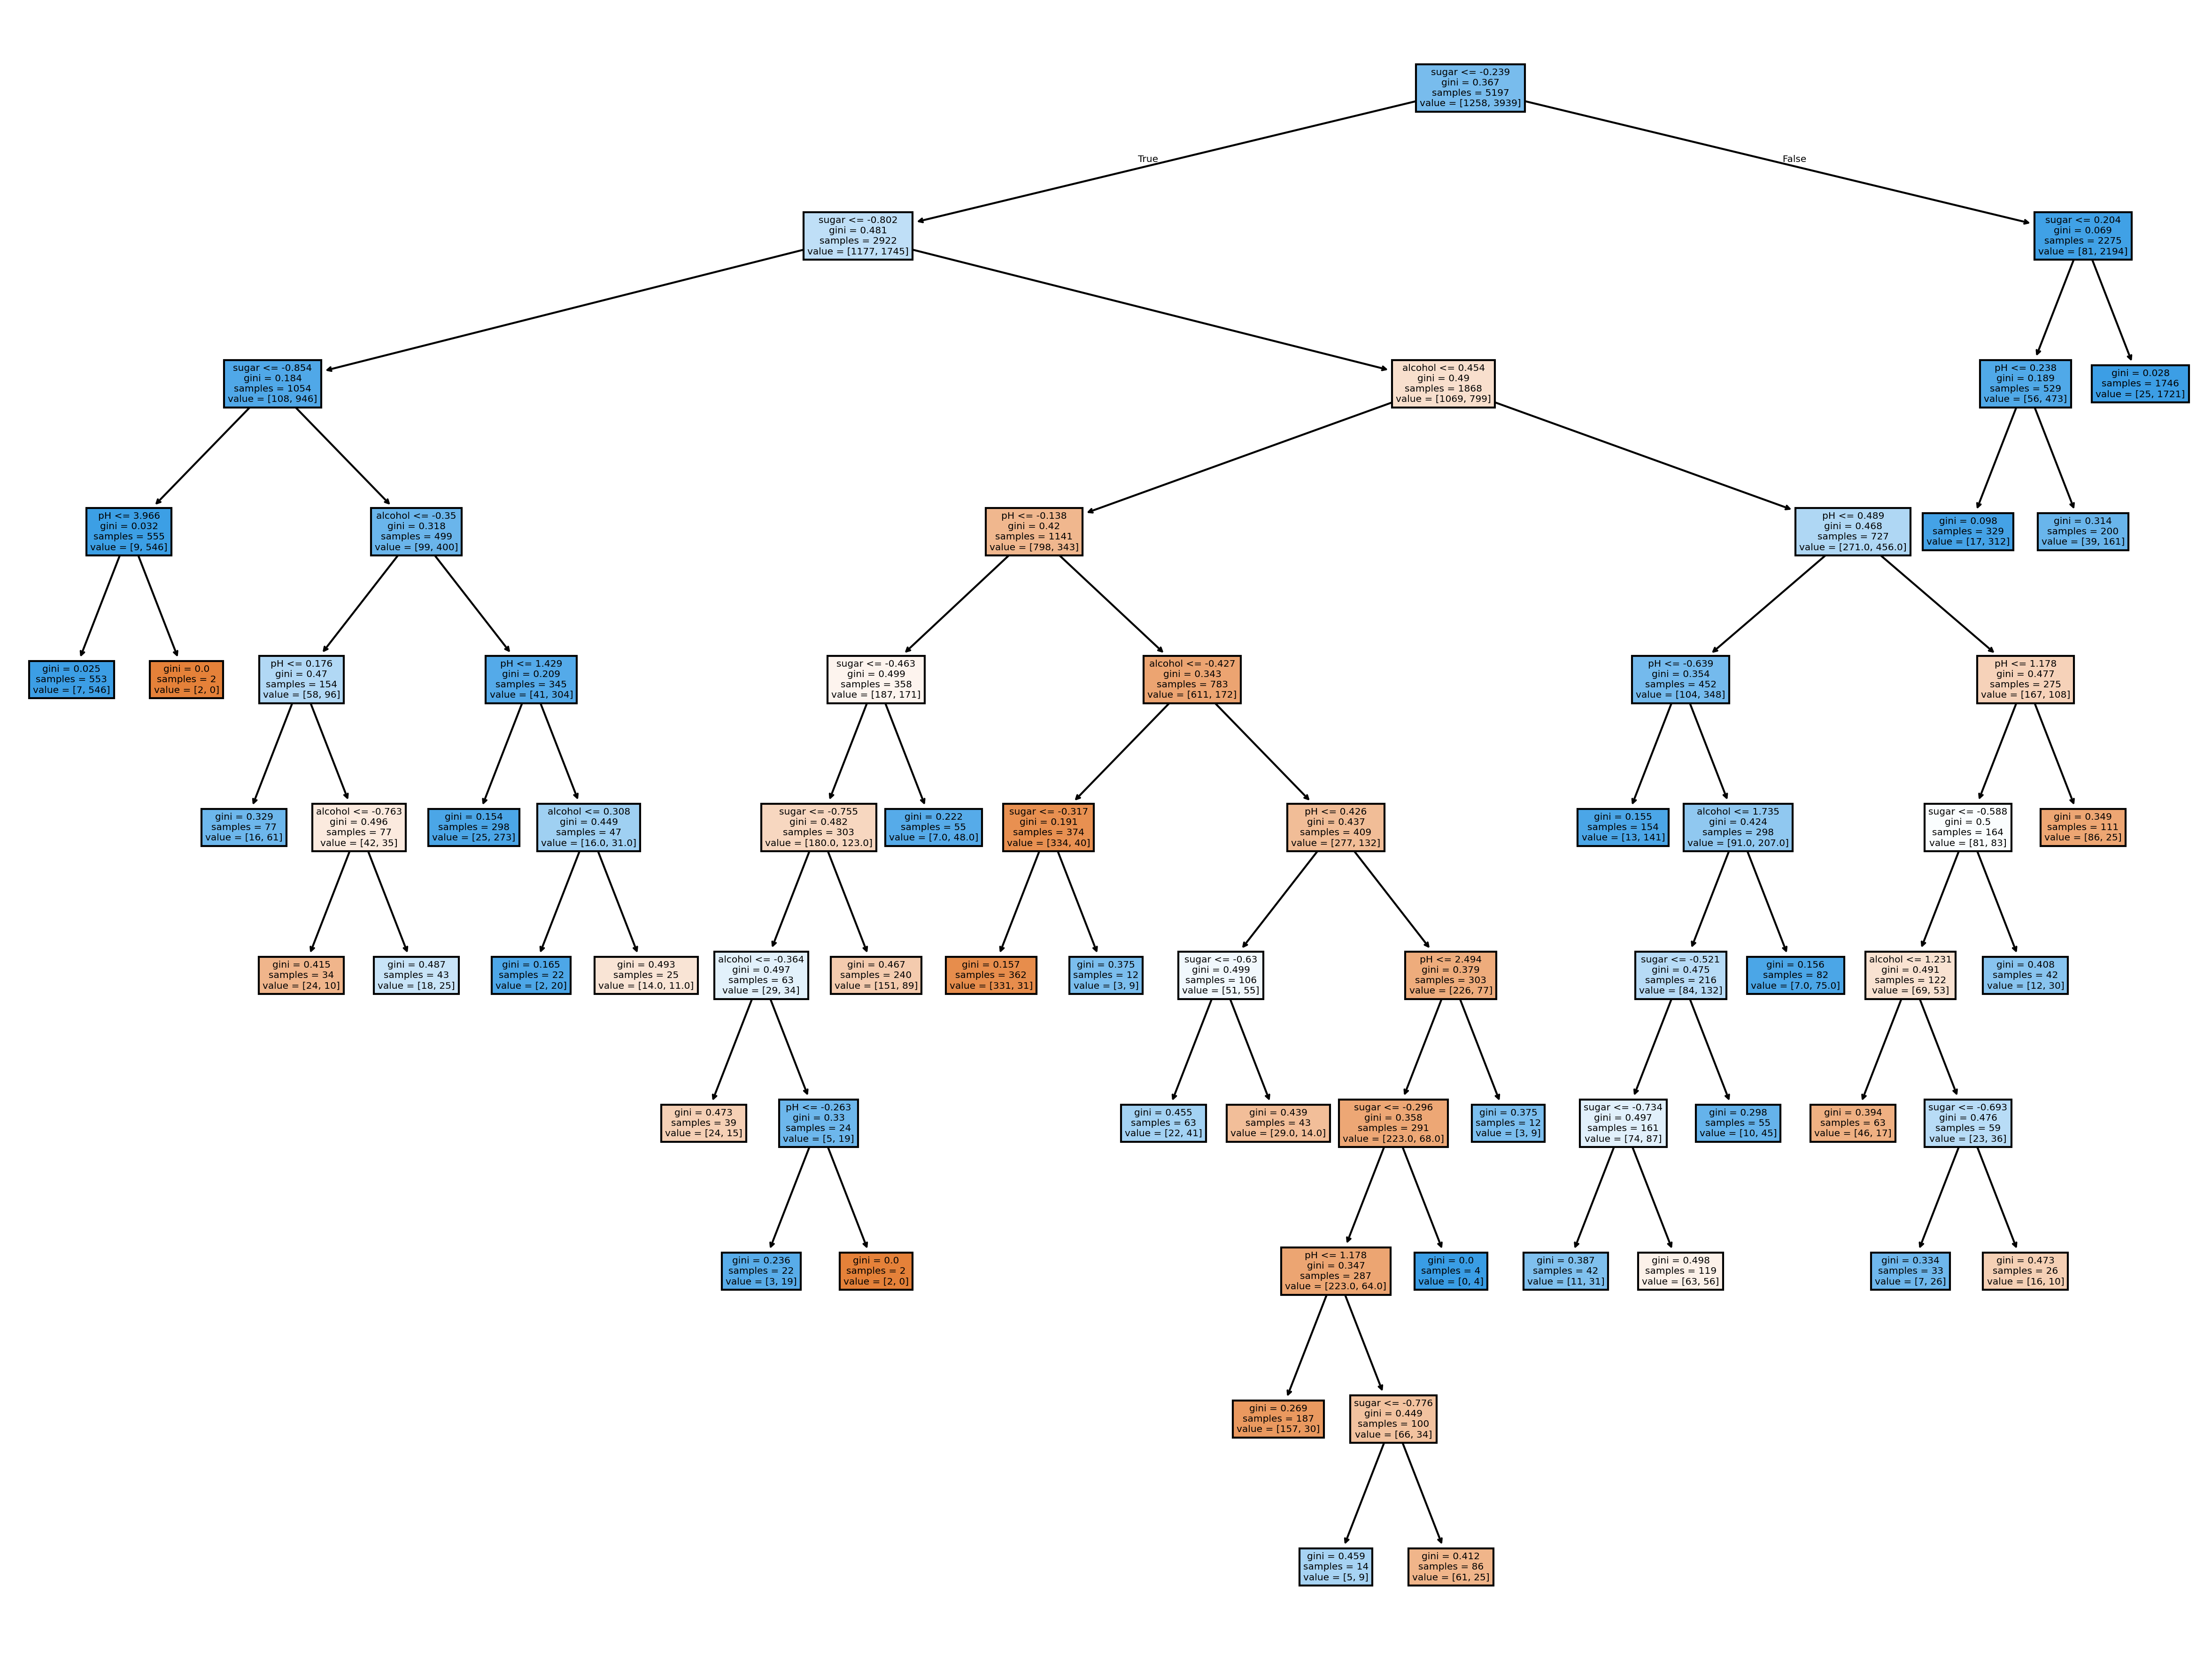

In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005 , random_state=42) # depth를 건드린 게 아니기 때문에 좌우대칭이 아니다.
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
plt.figure(figsize=(20,15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar','pH'])
plt.show()

In [ ]:
#text representation
from sklearn import tree
dt_clf_model_text = tree.export_text(dt, feature_names=['alcohol', 'sugar', 'pH'])
print(dt_clf_model_text)

|--- sugar <= -0.24
|   |--- sugar <= -0.80
|   |   |--- sugar <= -0.85
|   |   |   |--- pH <= 3.97
|   |   |   |   |--- class: 1.0
|   |   |   |--- pH >  3.97
|   |   |   |   |--- class: 0.0
|   |   |--- sugar >  -0.85
|   |   |   |--- alcohol <= -0.35
|   |   |   |   |--- pH <= 0.18
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- pH >  0.18
|   |   |   |   |   |--- alcohol <= -0.76
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- alcohol >  -0.76
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- alcohol >  -0.35
|   |   |   |   |--- pH <= 1.43
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- pH >  1.43
|   |   |   |   |   |--- alcohol <= 0.31
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- alcohol >  0.31
|   |   |   |   |   |   |--- class: 0.0
|   |--- sugar >  -0.80
|   |   |--- alcohol <= 0.45
|   |   |   |--- pH <= -0.14
|   |   |   |   |--- sugar <= -0.46
|   |   |   |   |   |--- sugar <= -0.76
|   |   |   |   |   |   |---